# A quick introduction to Linear Regression using Python

##### Import Packages

In [1]:
# data processing
import pandas as pd

# modeling
from sklearn.linear_model import LinearRegression

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

Read the wine quality data and perform linear regression using all numeric features to predict the wine quality.

##### Step 1: Read data into a dataframe.

In [2]:
df_wine = pd.read_csv(r'../data/winequality.csv', index_col=0)

df_wine.shape

(6497, 13)

##### Step 2: Check column types.

In [3]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine type                object
dtype: object

##### Step 3: Isolate numeric columns. We will use all variables of type float as predictors in our model.

In [4]:
x_vars = df_wine.columns[df_wine.dtypes == 'float64']

print(f'Predictors: \n {x_vars}')

Predictors: 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


##### Step 4: Create a linear regression object.

In [5]:
linreg = LinearRegression()

##### Step 5: Fit a regression model using these predictors. Use `quality` as the target variable.

In [6]:
X = df_wine[x_vars]
y = df_wine.quality

linreg.fit(X, y)

LinearRegression()

##### Step 6: View (print) intercept and coefficient values.

In [7]:
linreg.intercept_, linreg.coef_

(55.7627496117375,
 array([ 6.76839156e-02, -1.32789221e+00, -1.09656648e-01,  4.35587507e-02,
        -4.83713531e-01,  5.96988830e-03, -2.48129841e-03, -5.49669422e+01,
         4.39296072e-01,  7.68251760e-01,  2.67030009e-01]))

Combine coefficients with the column names.

In [8]:
list(zip(x_vars, linreg.coef_))

[('fixed acidity', 0.06768391557153439),
 ('volatile acidity', -1.3278922111895026),
 ('citric acid', -0.10965664815794537),
 ('residual sugar', 0.0435587507407037),
 ('chlorides', -0.4837135306860783),
 ('free sulfur dioxide', 0.005969888299276638),
 ('total sulfur dioxide', -0.002481298408366195),
 ('density', -54.96694221961982),
 ('pH', 0.4392960719386471),
 ('sulphates', 0.7682517601447444),
 ('alcohol', 0.26703000883876926)]

##### Create a dataframe and store the results (parameters and coefficients) into it.

In [9]:
df_coeff = pd.DataFrame(columns=['feature', 'coeff'])

df_coeff['feature'] = x_vars
df_coeff['coeff'] = linreg.coef_

df_coeff

,feature,coeff
0,fixed acidity,0.067684
1,volatile acidity,-1.327892
2,citric acid,-0.109657
3,residual sugar,0.043559
4,chlorides,-0.483714
5,free sulfur dioxide,0.005970
6,total sulfur dioxide,-0.002481
7,density,-54.966942
8,pH,0.439296
9,sulphates,0.768252


_Note: All of these features have different means and variances. In order to compare the coefficients across features, we must either standardize the data first or calculate standardized coefficients._

##### Step 7: Make predictions and store them in the same dataframe (as a new column).

In [10]:
df_wine['preds'] = linreg.predict(X)

df_wine[['quality', 'preds']].head(10)

,quality,preds
0,6,5.556809
1,6,5.281311
2,6,5.879632
3,6,5.697990
4,6,5.697990
5,6,5.879632
6,6,5.499621
7,6,5.556809
8,6,5.281311
9,6,5.934254


##### Step 8: Plot the actuals (wine quality) versus predicted.

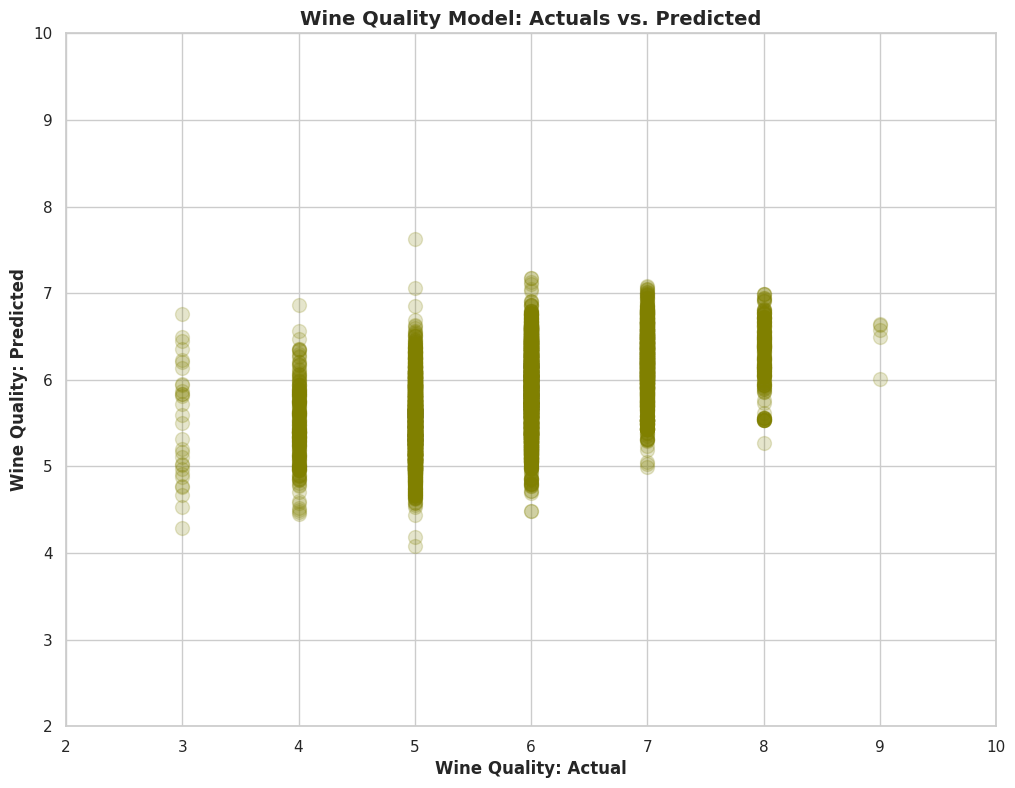

In [11]:
sns.set(style='whitegrid')
plt.figure().set_size_inches(12, 9)

plt.scatter(df_wine.quality, df_wine.preds, color='olive', s=100, alpha=0.2)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.xlim([2, 10])
plt.ylim([2, 10])

plt.xlabel('Wine Quality: Actual', fontsize=12, weight='semibold')
plt.ylabel('Wine Quality: Predicted', fontsize=12, weight='semibold')
plt.title('Wine Quality Model: Actuals vs. Predicted', fontsize=14, weight='semibold')
plt.show();

##### Coefficient of determination: R squared

In [12]:
from sklearn.metrics import r2_score

r2 = r2_score(df_wine.quality, df_wine.preds)

r2

0.29213688504020485

##### Mean Squared Error (MSE)

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_wine.quality, df_wine.preds)

0.5397154672783369

##### Forward selection

In [14]:
corr = []
for x in x_vars:
    corr.append(df_wine[x].corr(df_wine['quality']))

sorted_vars = [x for _, x in sorted(zip(corr, x_vars), reverse=True)]

sorted_vars

['alcohol',
 'citric acid',
 'free sulfur dioxide',
 'sulphates',
 'pH',
 'residual sugar',
 'total sulfur dioxide',
 'fixed acidity',
 'chlorides',
 'volatile acidity',
 'density']

In [15]:
for i in range(len(sorted_vars)):
    _x_vars = sorted_vars[:i+1]
    X = df_wine[_x_vars]
    print(f'Model with {i+1} predictors')
    
    _preds = linreg.fit(X, y).predict(X)
    
    _adj_r2 = 1 - (1 - r2_score(df_wine.quality, _preds)) * \
            (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)
    
    print(f'\tMSE: {mean_squared_error(y, _preds):.3f}, Adj. R-squared: {_adj_r2:.3f}')

Model with 1 predictors
	MSE: 0.612, Adj. R-squared: 0.197
Model with 2 predictors
	MSE: 0.606, Adj. R-squared: 0.205
Model with 3 predictors
	MSE: 0.593, Adj. R-squared: 0.221
Model with 4 predictors
	MSE: 0.591, Adj. R-squared: 0.225
Model with 5 predictors
	MSE: 0.591, Adj. R-squared: 0.225
Model with 6 predictors
	MSE: 0.584, Adj. R-squared: 0.233
Model with 7 predictors
	MSE: 0.583, Adj. R-squared: 0.235
Model with 8 predictors
	MSE: 0.581, Adj. R-squared: 0.237
Model with 9 predictors
	MSE: 0.575, Adj. R-squared: 0.245
Model with 10 predictors
	MSE: 0.541, Adj. R-squared: 0.289
Model with 11 predictors
	MSE: 0.540, Adj. R-squared: 0.291


**Exercise:** Use [`statsmodels` package](https://www.statsmodels.org/stable/index.html) to build a linear regression model using this dataset.